<a href="https://colab.research.google.com/github/Gourav-Bansal/Sentiment-Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



TypeError: 'NoneType' object is not subscriptable

In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from wordcloud import WordCloud


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
twitter_data = pd.read_csv('twitter_training.csv')
print(twitter_data.shape)


(74681, 4)


In [ ]:
twitter_data.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
column_names = ['id','entity', 'sentiment', 'text']
twitter_data = pd.read_csv('twitter_training.csv', names=column_names)
twitter_data.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
twitter_data.isnull().sum()

,0
id,0
entity,0
sentiment,0
text,686


In [ ]:
twitter_data.dropna(inplace=True)
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         73996 non-null  int64 
 1   entity     73996 non-null  object
 2   sentiment  73996 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [ ]:
twitter_data['sentiment'].value_counts()

,count
sentiment,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


Stemming

In [ ]:
port_stem = PorterStemmer()

def stemming(content):

    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


In [ ]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)


In [ ]:
twitter_data.head()


,id,entity,sentiment,text,stemmed_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get borderland murder


VISUALIZATION

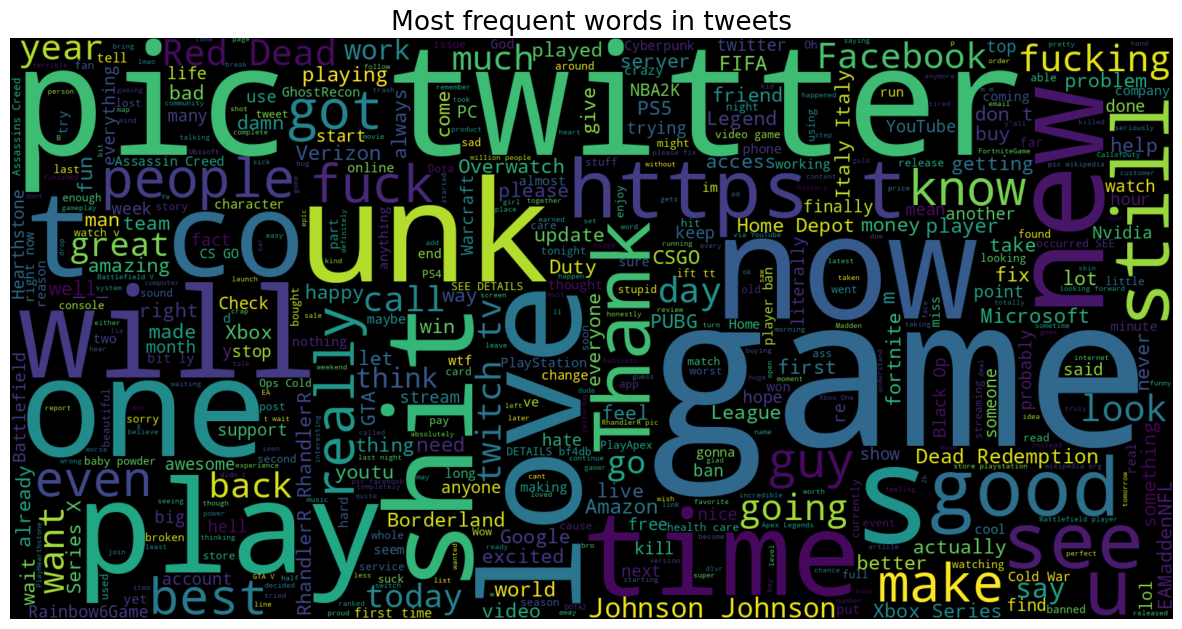

In [ ]:
text = ' '.join([word for word in twitter_data['text']])
plt.figure(figsize=(15,10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in tweets', fontsize=19)
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

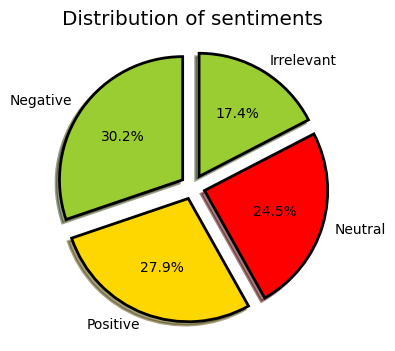

In [ ]:
fig = plt.figure(figsize=(4,4))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = twitter_data['sentiment'].value_counts()
explode = (0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

<Axes: xlabel='sentiment', ylabel='count'>

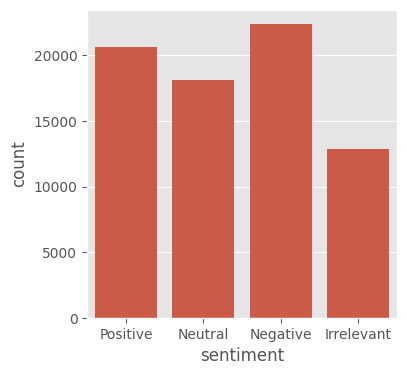

In [ ]:
fig = plt.figure(figsize=(4,4))
sns.countplot(x='sentiment', data = twitter_data)

In [ ]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['sentiment'].values

In [ ]:
print(Y)

['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

In [ ]:
print(Y_test)

[2 1 3 ... 3 3 2]


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.833519156699777


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7797297297297298


In [ ]:
encoder = LabelEncoder()
Y = ['positive', 'negative', 'irrelevant', 'neutral']
Y_encoded = encoder.fit_transform(Y)

print(encoder.classes_)

['irrelevant' 'negative' 'neutral' 'positive']


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('/content/trained_model.sav', 'rb'))

In [ ]:
X_new = X_test[70]
print(Y_test[70])

prediction = loaded_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Irrelevant')
elif (prediction[0]==1):
  print('The news is Negative')
elif (prediction[0]==2):
  print('The news is Neutral')
else:
  print('The news is Positive')

3
[3]
The news is Positive
